In [1]:
#Packages

In [2]:
import numpy as np
import pandas as pd #to read dataset
#for graphics of best model
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error #mean_squared_error(y_true, y_pred)
from sklearn.metrics import r2_score #r2_score(y_true, y_pred)

#For the decision tree graphic
#Need: pip install pydot and pip install graphviz and sudo pip install pydot and pip install graphviz, update nope need to install homebrew then: brew install graphviz
import pydot
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#For cluster graphics
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [3]:
#Data & Splitting

In [4]:
#Dataset 
df = pd.read_csv('12kr2.csv')
print(df.columns)
print(df.shape)
print(df.dtypes)

Index(['FOUND_BY', 'DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',
       'number

In [5]:
#first, separate the full df into 2 by rows assigning some % of the rows to training and some to testing, for example by

train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

#in this way you slice your data horizontally.

#then, identify which columns should be in your training data (X) and which in your training labels(Y). Then explicitly select them:

X_train = train[['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',]].values.astype(float)
y_train = train['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED'].values.astype(float) 

#Note that columns should be the same for training and testing, including the order:

X_test = test[['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',]].values.astype(float)
y_test = test['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED'].values.astype(float)

In [6]:
#Function to evaluate RMSE

In [7]:
def model_evaluate(y_train, y_test, y_pred, y_pred_train):
    metrics = {}
    #RMSE Test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    #RMSE Train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    #MSE Test
    mse_test = mean_squared_error(y_test, y_pred)
    #MSE Train
    mse_train = mean_squared_error(y_train, y_pred_train)
    #R2 Test
    r2_test = r2_score(y_test, y_pred)
    #R2 Train
    r2_train = r2_score(y_train, y_pred_train)

    metrics = {
              'RMSE Test': rmse_test,
              'RMSE Train': rmse_train,
              'MSE Test': mse_test,
              'MSE Train': mse_train,
              'R2 Test': r2_test,
              'R2 Train': r2_train}

    return metrics 

In [8]:
#Iteration 1: Using the model with default hyperparameters

In [9]:
#1. import the class/model, already did in first line
#2. Instantiate the estimator
#model = RandomForestRegressor(random_state = 1, n_jobs = -1) 
model = XGBRegressor(random_state = 1, n_jobs = -1)
#3. Fit the model with data aka model training
model.fit(X_train, y_train)

#4. Predict the response for a new observation
y_pred = model.predict(X_test)


y_pred_train = model.predict(X_train)

In [10]:
model_evaluate(y_train, y_test, y_pred, y_pred_train)

{'RMSE Test': 19.36884432508804,
 'RMSE Train': 1.260196072249085,
 'MSE Test': 375.1521304894953,
 'MSE Train': 1.588094140512021,
 'R2 Test': 0.5234135565679394,
 'R2 Train': 0.9983136242646626}

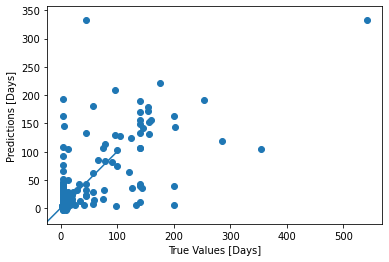

In [11]:
test_predictions = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Days]')
plt.ylabel('Predictions [Days]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

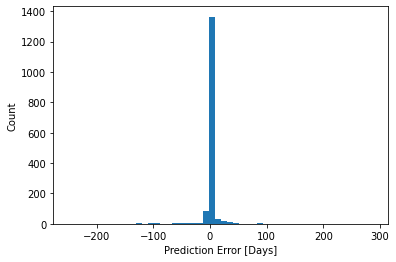

In [12]:
# histogram
error = y_pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [Days]")
_ = plt.ylabel("Count")

In [13]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [14]:
dfxTrain=pd.DataFrame(X_train, columns=['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfut',])


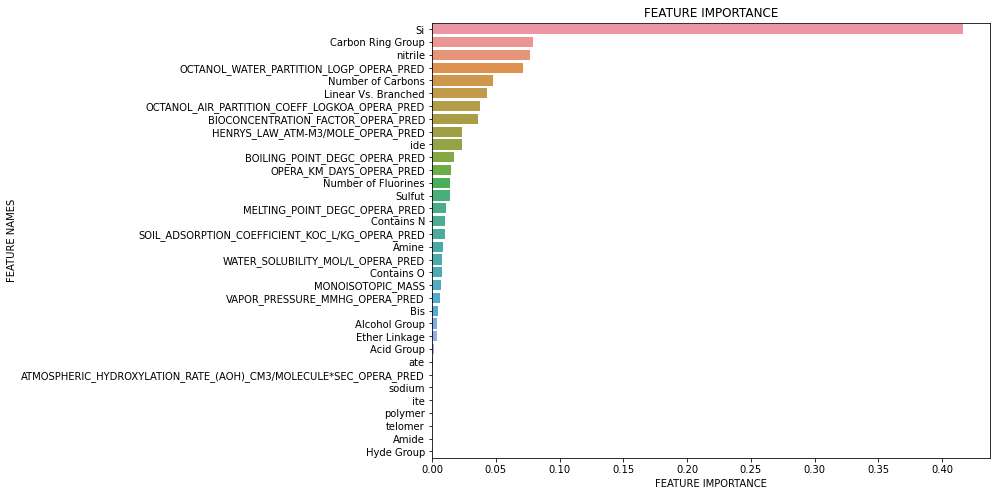

In [15]:
plot_feature_importance(model.feature_importances_, dfxTrain.columns)

In [16]:
#Extract List of features from data frame.
feature_list = list(dfxTrain.columns)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Si                   Importance: 0.41999998688697815
Variable: Carbon Ring Group    Importance: 0.07999999821186066
Variable: nitrile              Importance: 0.07999999821186066
Variable: OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED Importance: 0.07000000029802322
Variable: Number of Carbons    Importance: 0.05000000074505806
Variable: BIOCONCENTRATION_FACTOR_OPERA_PRED Importance: 0.03999999910593033
Variable: OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED Importance: 0.03999999910593033
Variable: Linear Vs. Branched  Importance: 0.03999999910593033
Variable: BOILING_POINT_DEGC_OPERA_PRED Importance: 0.019999999552965164
Variable: HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED Importance: 0.019999999552965164
Variable: ide                  Importance: 0.019999999552965164
Variable: MONOISOTOPIC_MASS    Importance: 0.009999999776482582
Variable: Number of Fluorines  Importance: 0.009999999776482582
Variable: Contains N           Importance: 0.009999999776482582
Variable: Contains O           I

In [17]:
#Iteration 2: I used RandomizedSearchCV to get optimum values of hyper-parameters

In [18]:
model = XGBRegressor(n_estimators = 100, random_state = 1, n_jobs = -1) 

param_grid = { 
    'objective': ["reg:squarederror","reg:squaredlogerror", "reg:logistic"],
    'learning_rate' : np.linspace(0, 1.0, 11),
     'max_depth' : [x for x in range(1,20)]
}
from sklearn.model_selection import RandomizedSearchCV
CV_rfc = RandomizedSearchCV(estimator=model, param_distributions =param_grid, n_jobs = -1, cv= 10, n_iter = 50)
CV_rfc.fit(X_train, y_train)

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/xgboost/sklearn.py", line 603, in fit
    callbacks=callbacks)
  File "/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/xgboost/training.py", line 235, in train
    early_stopping_rounds=early_stopping_rounds)
  File "/Users/isabelayepes/opt/anaconda3/envs/keras/lib/pyt

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_meth

In [19]:
print(CV_rfc.best_params_)
CV_rfc.best_score_

{'objective': 'reg:squarederror', 'max_depth': 4, 'learning_rate': 0.30000000000000004}


0.3875068011364924

In [27]:
#1. import the class/model, already did in first line
#2. Instantiate the estimator
model = XGBRegressor(n_estimators = 100, random_state = 1, n_jobs = -1, objective='reg:squarederror', learning_rate = 0.3, max_depth = 4)  
#3. Fit the model with data aka model training
model.fit(X_train, y_train)

#4. Predict the response for a new observation
y_pred = model.predict(X_test)


y_pred_train = model.predict(X_train)


In [28]:
model_evaluate(y_train, y_test, y_pred, y_pred_train)

{'RMSE Test': 17.844291537857956,
 'RMSE Train': 5.026026139399017,
 'MSE Test': 318.41874048806903,
 'MSE Train': 25.260938753922183,
 'R2 Test': 0.5954866233777809,
 'R2 Train': 0.9731757500517417}

In [32]:
#Failed Attempt at GridSearchCV due to estimator iterations with failed model fits...